#### *数据链接*

https://www.kaggle.com/datasets/ramjasmaurya/top-250s-in-imdb?select=imdb+%281000+movies%29+in+june+2022.csv

#### *票房数据*

https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/all-time

## 项目概述

### 数据集是在IMDB.com（又名互联网电影数据库）上截至2022年6月1000部最高评分的电影，包含包括评级、类型、年份、演员、票数、票房等特征。

### 此分析项目将根据上述特征，从不同方面进行分析。

## *一，总体分析：*

#### Q1. 自1920年代以来，一些重要的电影特征的有什么发展趋势？（如制作数量、票房、时长等）

#### Q2. IMDB评级和其他电影特征之间有相关性吗？

## *二，就流行的电影类型和其组合而言：*

#### Q3. 在不同年代中，哪些类型或类型组合的电影数量比例更高（更受欢迎）？

#### Q4. 在这些年代中，这些属于“流行的电影类型/类型组合”的电影的“平均票房”和“制作数量”有什么趋势？

#### Q5. 这些“流行的电影类型/类型组合”电影的不同特征之间有什么相关性？

## *三，就导演而言：*

#### Q6. 每位导演的“平均IMDB评级”与“执导电影总数”是多少？两者之间有相关性吗？

#### Q7. 与其他电影相比，“导演也有参演的电影”是否获得了更高的IMDB评级或更高的票房？或者倾向于具有更高或更短的时长？

#### Q8. 回到“流行的电影类型/类型组合”，相比其他电影，他们是否也倾向于获得更高的IMDB评级或更高的票房？

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')
%matplotlib inline

In [3]:
df=pd.read_csv('imdb (1000 movies) in june 2022.csv')
df.head(3)

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M


#### 更改列名，并仅保留有用的列

In [4]:
cols=['Ranking', 'Movie_Name', 'Year', 'Certificate', 'Runtime(Minutes)', 'Genre', 'Rating', 'Metascore', 'About',
      'Director', 'Actor_1', 'Actor_2', 'Actor_3', 'Actor_4', 'Votes', 'Gross_Collection(Million)']
df.columns=cols
df = df.drop(columns=['Ranking','Certificate','About'])
df.sample(5)

,Movie_Name,Year,Runtime(Minutes),Genre,Rating,Metascore,Director,Actor_1,Actor_2,Actor_3,Actor_4,Votes,Gross_Collection(Million)
101,Like Stars on Earth,-2007,165 min,"Drama, Family",8.3,NaN,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,Tisca Chopra,"189,589",$1.22M
991,Breakfast at Tiffany's,-1961,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,"178,134",NaN
663,Cowboy Bebop: The Movie,-2001,115 min,"Animation, Action, Crime",7.8,61.0,Shin'ichirô Watanabe,Tensai Okamura,Hiroyuki Okiura,Yoshiyuki Takei,Beau Billingslea,"48,271",$1.00M
604,The Hateful Eight,-2015,168 min,"Crime, Drama, Mystery",7.8,68.0,Quentin Tarantino,Samuel L. Jackson,Kurt Russell,Jennifer Jason Leigh,Walton Goggins,"582,632",$54.12M
225,Wolf Children,-2012,117 min,"Animation, Drama, Family",8.1,71.0,Mamoru Hosoda,Aoi Miyazaki,Takao Osawa,Haru Kuroki,Yukito Nishii,"44,205",NaN


In [5]:
# 中译：Movie_Name：电影名，Year：年份，Runtime(Minutes)：时长（分钟），Genre：类型，Rating：评分，Metascore：主流媒体评分，
# Director：导演，Actor_1：演员1-4，Votes：票数，Gross_Collection(Million)：票房（百万元）
print(df.info(),df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Movie_Name                 1000 non-null   object 
 1   Year                       1000 non-null   object 
 2   Runtime(Minutes)           1000 non-null   object 
 3   Genre                      1000 non-null   object 
 4   Rating                     1000 non-null   float64
 5   Metascore                  837 non-null    float64
 6   Director                   1000 non-null   object 
 7   Actor_1                    1000 non-null   object 
 8   Actor_2                    1000 non-null   object 
 9   Actor_3                    1000 non-null   object 
 10  Actor_4                    1000 non-null   object 
 11  Votes                      1000 non-null   object 
 12  Gross_Collection(Million)  820 non-null    object 
dtypes: float64(2), object(11)
memory usage: 101.7+ KB

In [6]:
# 有一定数量的电影没有票房(“gross_collection”)记录
df[(df['Gross_Collection(Million)'].isnull())|(df['Gross_Collection(Million)']=='$0.00M')].sample(5)

,Movie_Name,Year,Runtime(Minutes),Genre,Rating,Metascore,Director,Actor_1,Actor_2,Actor_3,Actor_4,Votes,Gross_Collection(Million)
896,Jules and Jim,-1962,105 min,"Drama, Romance",7.7,97.0,François Truffaut,Jeanne Moreau,Oskar Werner,Henri Serre,Vanna Urbino,"41,167",NaN
138,Tumbbad,-2018,104 min,"Drama, Fantasy, Horror",8.2,NaN,Rahi Anil Barve,Anand Gandhi,Adesh Prasad,Sohum Shah,Jyoti Malshe,"42,528",NaN
439,Sanjuro,-1962,96 min,"Action, Drama, Thriller",8.0,NaN,Akira Kurosawa,Toshirô Mifune,Tatsuya Nakadai,Keiju Kobayashi,Yûnosuke Itô,"37,930",NaN
582,The Philadelphia Story,-1940,112 min,"Comedy, Romance",7.9,96.0,George Cukor,Cary Grant,Katharine Hepburn,James Stewart,Ruth Hussey,"68,752",NaN
211,Klaus,-2019,96 min,"Animation, Adventure, Comedy",8.1,65.0,Sergio Pablos,Carlos Martínez López,Jason Schwartzman,J.K. Simmons,Rashida Jones,"143,603",NaN


#### 没有票房(“Gross_collection”)记录的电影也可能缺少主流媒体评分(“Metascore”)记录, 和较低的“票数”，因此此分析（例如，当我们按类型/年份对数据进行分组时）可能会因为这些空值而给出有偏见的结果。

## 只有具有票房(“gross_collection”)记录的记录才能用于更公平、更有效的分析。

In [7]:
# 筛选掉没有票房(“gross_collection”)数据的行
df=df[(df['Gross_Collection(Million)'].notnull())&(df['Gross_Collection(Million)']!='$0.00M')]

#### 其他清洗步骤

In [8]:
# 更改数据类型(dtype)和去掉无用的字符串
df['Year']=df['Year'].str.replace('-','')
df['Runtime(Minutes)']=df['Runtime(Minutes)'].str.replace(' min','').astype('float64')
df['Votes']=df['Votes'].str.replace(',','').astype('int64')
df['Gross_Collection(Million)']=df['Gross_Collection(Million)'].str.replace('$','')
df['Gross_Collection(Million)']=df['Gross_Collection(Million)'].str.replace('M','').astype('float64')

In [9]:
# 从列中仅提取数值数据的函数
def only_numerics(seq):
    seq_type= type(seq)
    return seq_type().join(filter(seq_type.isdigit, seq))

In [10]:
df['Year']=df['Year'].apply(only_numerics).astype('int64')

In [11]:
# 将“类型”('genre')列拆分为各只包含一种流派的列
df['Genre_1']=df['Genre'].str.split(', ',expand=True)[0]
df['Genre_2']=df['Genre'].str.split(', ',expand=True)[1]
df['Genre_3']=df['Genre'].str.split(', ',expand=True)[2]
df['Count']=1
df=df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 997
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Movie_Name                 817 non-null    object 
 1   Year                       817 non-null    int64  
 2   Runtime(Minutes)           817 non-null    float64
 3   Genre                      817 non-null    object 
 4   Rating                     817 non-null    float64
 5   Metascore                  736 non-null    float64
 6   Director                   817 non-null    object 
 7   Actor_1                    817 non-null    object 
 8   Actor_2                    817 non-null    object 
 9   Actor_3                    817 non-null    object 
 10  Actor_4                    817 non-null    object 
 11  Votes                      817 non-null    int64  
 12  Gross_Collection(Million)  817 non-null    float64
 13  Genre_1                    817 non-null    object 

In [13]:
# 由于数据不足，没有计算平均主流媒体评分('Metascore')的方法或填充其空值
# 因此，本分析将不集中关注主流媒体评分('Metascore')
df_year_meta=df.groupby(['Year'])['Metascore'].mean()
df_year_meta

Year
1921          NaN
1924          NaN
1925    97.000000
1926          NaN
1927    98.000000
          ...    
2017    79.153846
2018    74.846154
2019    81.285714
2020    72.000000
2021    72.500000
Name: Metascore, Length: 96, dtype: float64

## *一，总体分析：*

#### Q1.自1920年代以来，一些重要的电影特征的有什么发展趋势？（如制作数量、票房、时长等）

In [14]:
# 按年的电影数量
df_year_count=df.groupby('Year').count()
# 按年份的总票房
df_year_gross=df.groupby(['Year'])['Gross_Collection(Million)'].sum()
# 按年份平均运行时长（分钟）
df_year_ave_runt=round(df.groupby('Year')['Runtime(Minutes)'].mean(),2)
# 按年的投票数
df_year_votes=df.groupby('Year')['Votes'].sum()

Text(0, 0.5, 'Total votes (Million)')

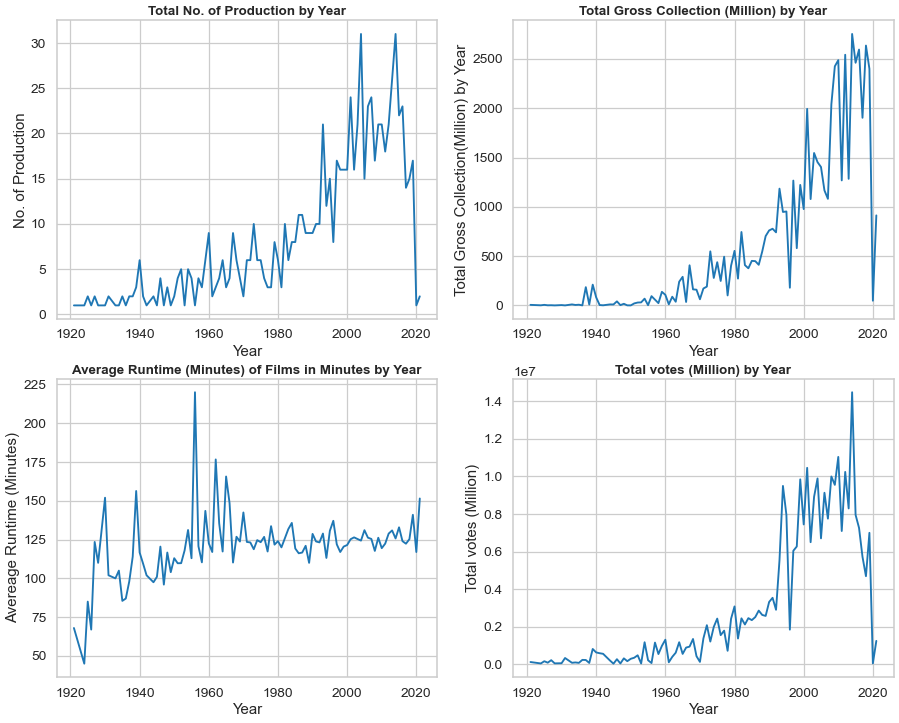

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(18,14.5), dpi=60, nrows=2, ncols=2)

sns.lineplot(data=df_year_count['Count'],ax=ax1)
sns.lineplot(data=df_year_gross,ax=ax2)
sns.lineplot(data=df_year_ave_runt,ax=ax3)
sns.lineplot(data=df_year_votes,ax=ax4)

ax1.set_title('Total No. of Production by Year', fontsize=16, fontweight ='bold')
ax2.set_title('Total Gross Collection (Million) by Year', fontsize=16, fontweight ='bold')
ax3.set_title('Average Runtime (Minutes) of Films in Minutes by Year', fontsize=16, fontweight ='bold')
ax4.set_title('Total votes (Million) by Year', fontsize=16, fontweight ='bold')

ax1.set_ylabel('No. of Production')
ax2.set_ylabel('Total Gross Collection(Million) by Year')
ax3.set_ylabel('Avereage Runtime (Minutes)')
ax4.set_ylabel('Total votes (Million)')

## 发现

#### 总体上，大多数电影特征随着时间的推移而不断增长，并且在2000-2020年达到峰值。

#### 1950年代的一些电影平均时长明显较长，但对其他电影特征没有显著影响，或者令其排名更高。
<img src="50's films.png" width="650">

#### Q2.IMDB评级和其他电影特征之间有相关性吗？

r^2 of Rating VS Runtime in Minutes = 0.062.
r^2 of Rating VS No. of Votes = 0.324.
r^2 of Rating VS Gross_Collection(Million) = 0.012.
r^2 of Rating VS Metascore = 0.008.


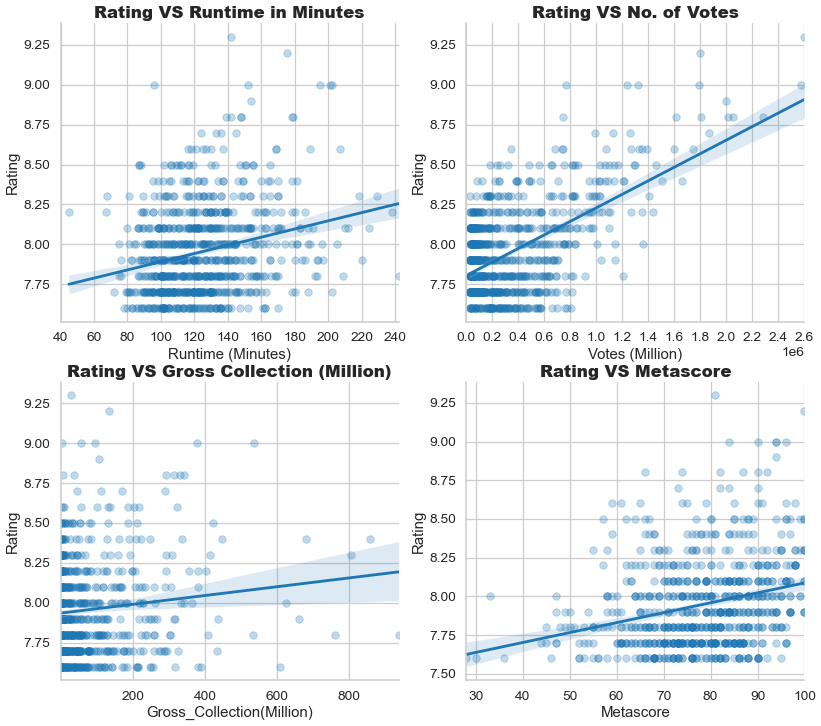

In [16]:
from sklearn.linear_model import LinearRegression 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(16,14.5), dpi=60, nrows=2, ncols=2)

x1=df['Runtime(Minutes)']
x2=df['Votes']
x3=df['Gross_Collection(Million)']
x4=df['Metascore']
y=df['Rating']

sns.regplot(x=x1, y=y, ax=ax1, scatter_kws={'alpha':0.28})
sns.regplot(x=x2, y=y, ax=ax2, scatter_kws={'alpha':0.28})
sns.regplot(x=x3, y=y, ax=ax3, scatter_kws={'alpha':0.28})
sns.regplot(x=x4, y=y, ax=ax4, scatter_kws={'alpha':0.28})

ax1.set_title('Rating VS Runtime in Minutes', fontsize=20, fontweight ='heavy')
ax1.set_xticks(range(40,260,20))
ax1.set_xlabel('Runtime (Minutes)')

ax2.set_title('Rating VS No. of Votes', fontsize=20, fontweight ='heavy')
ax2.set_xticks(range(0,2750000,200000))
ax2.set_xlabel('Votes (Million)')

ax3.set_title('Rating VS Gross Collection (Million)', fontsize=20, fontweight ='heavy')

ax4.set_title('Rating VS Metascore', fontsize=20, fontweight ='heavy')

# 计算r^2值
lin_reg_1=LinearRegression().fit(df[['Runtime(Minutes)']], y)
lin_reg_2=LinearRegression().fit(df[['Votes']], y)
lin_reg_3=LinearRegression().fit(df[['Gross_Collection(Million)']], y)
lin_reg_4=LinearRegression().fit(df[['Metascore']].notnull(), y)

r2_1=lin_reg_1.score(df[['Runtime(Minutes)']], y)
r2_2=lin_reg_2.score(df[['Votes']], y)
r2_3=lin_reg_3.score(df[['Gross_Collection(Million)']], y)
r2_4=lin_reg_4.score(df[['Metascore']].notnull(), y)

print(f'r^2 of Rating VS Runtime in Minutes = {round(r2_1,3)}.')
print(f'r^2 of Rating VS No. of Votes = {round(r2_2,3)}.')
print(f'r^2 of Rating VS Gross_Collection(Million) = {round(r2_3,3)}.')
print(f'r^2 of Rating VS Metascore = {round(r2_4,3)}.')

sns.despine()
plt.show()

### 发现

### IMDB评级与电影的其他数字特征没有很强的相关性！！

#### 因为低于0.4的r^2值表示两个目标特征之间的相关性弱。

#### （即是 r^2 小于 0.7，请参考https://www.investopedia.com/terms/r/r-squared.asp)

## *二，就流行的电影类型和其组合而言：*

In [17]:
# 检查最常见的类型
display(df['Genre_1'].value_counts().nlargest(3),df['Genre_2'].value_counts().nlargest(3),df['Genre_3'].value_counts().nlargest(3))

Drama     229
Action    143
Comedy    128
Name: Genre_1, dtype: int64

Drama        276
Adventure     99
Crime         59
Name: Genre_2, dtype: int64

Drama       85
Thriller    79
Romance     64
Name: Genre_3, dtype: int64

### 大多数电影有超过一种类型，这可能是影响一部电影的排名或总票房的一个因素！！

#### 让我们关注最受欢迎的电影类型-“戏剧”('Drama')，以及与其他类型的组合

In [18]:
# 检查电影最常见类型的分布
# 中译：Drama：戏剧，Action：动作，Comedy：喜剧，Crime：犯罪，Adventure：冒险，Thriller：惊悚，Romance：浪漫
Genre_list=['Drama','Action','Comedy','Crime','Adventure','Thriller','Romance']

for Genre in Genre_list:
    Genre_count=df[df['Genre'].str.contains(Genre)].shape[0]
    print(f'{Genre_count} films, i.e. {round(Genre_count/df.Genre.count()*100,2)}% of films are in "{Genre}" Genre. \n')

590 films, i.e. 72.22% of films are in "Drama" Genre. 

159 films, i.e. 19.46% of films are in "Action" Genre. 

192 films, i.e. 23.5% of films are in "Comedy" Genre. 

164 films, i.e. 20.07% of films are in "Crime" Genre. 

164 films, i.e. 20.07% of films are in "Adventure" Genre. 

104 films, i.e. 12.73% of films are in "Thriller" Genre. 

108 films, i.e. 13.22% of films are in "Romance" Genre. 



### 最受欢迎的类型是“戏剧”。

### 让我们更深入地分析“戏剧”类型的电影，以及它们与另外4种最常见类型之间的关系。

In [19]:
genre_1='Adventure'
genre_2='Action'
genre_3='Comedy'
genre_4='Crime'
genre_5='Drama'
dra_len=df[df['Genre'].str.contains(genre_5)].shape[0]
dra_only_len=df[df['Genre']==genre_5].shape[0]
adv_dra_len=df[(df['Genre'].str.contains(genre_1))&(df['Genre'].str.contains(genre_5))].shape[0]
act_dra_len=df[(df['Genre'].str.contains(genre_2))&(df['Genre'].str.contains(genre_5))].shape[0]
com_dra_len=df[(df['Genre'].str.contains(genre_3))&(df['Genre'].str.contains(genre_5))].shape[0]
cri_dra_len=df[(df['Genre'].str.contains(genre_4))&(df['Genre'].str.contains(genre_5))].shape[0]

print(f'Facts about {genre_5} genre and combinations with other genres, \n   {dra_len} films are in the most popular genre - {genre_5}, \n     where {dra_only_len} of them i.e. {round(dra_only_len/dra_len*100,2)}% have {genre_5} as their only genre, \n     where {adv_dra_len} of them, i.e. {round(adv_dra_len/dra_len*100,2)}% are also in {genre_1} genre, \n     where {act_dra_len} of them, i.e. {round(act_dra_len/dra_len*100,2)}% are also in {genre_2} genre, \n     where {com_dra_len} of them, i.e. {round(com_dra_len/dra_len*100,2)}% are also in {genre_3} genre, \n     where {cri_dra_len} of them, i.e. {round(cri_dra_len/dra_len*100,2)}% are also in {genre_4} genre.')

Facts about Drama genre and combinations with other genres, 
   590 films are in the most popular genre - Drama, 
     where 73 of them i.e. 12.37% have Drama as their only genre, 
     where 46 of them, i.e. 7.8% are also in Adventure genre, 
     where 65 of them, i.e. 11.02% are also in Action genre, 
     where 104 of them, i.e. 17.63% are also in Comedy genre, 
     where 129 of them, i.e. 21.86% are also in Crime genre.


In [20]:
# 首先，用“年”列新增“年代”列
df['Decade']=df['Year']//10*10
df.sample(5)

,Movie_Name,Year,Runtime(Minutes),Genre,Rating,Metascore,Director,Actor_1,Actor_2,Actor_3,Actor_4,Votes,Gross_Collection(Million),Genre_1,Genre_2,Genre_3,Count,Decade
672,Hamlet,1996,242.0,Drama,7.8,NaN,Kenneth Branagh,Kenneth Branagh,Julie Christie,Derek Jacobi,Kate Winslet,38061,4.41,Drama,None,None,1,1990
518,Children of Men,2006,109.0,"Action, Drama, Sci-Fi",7.9,84.0,Alfonso Cuarón,Julianne Moore,Clive Owen,Chiwetel Ejiofor,Michael Caine,494064,35.55,Action,Drama,Sci-Fi,1,2000
133,Metropolis,1927,153.0,"Drama, Sci-Fi",8.3,98.0,Fritz Lang,Brigitte Helm,Alfred Abel,Gustav Fröhlich,Rudolf Klein-Rogge,172159,1.24,Drama,Sci-Fi,None,1,1920
904,Fantasia,1940,125.0,"Animation, Family, Fantasy",7.7,96.0,James Algar,Samuel Armstrong,Ford Beebe Jr.,Norman Ferguson,David Hand,95266,76.41,Animation,Family,Fantasy,1,1940
28,Terminator 2: Judgment Day,1991,137.0,"Action, Sci-Fi",8.6,75.0,James Cameron,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,1073997,204.84,Action,Sci-Fi,None,1,1990


In [21]:
# 提取每年代的前三大类型
df_top3_genre_1=df.groupby('Decade')['Genre_1'].apply(lambda genre:genre.value_counts().nlargest(3)).reset_index()
df_top3_genre_2=df.groupby('Decade')['Genre_2'].apply(lambda genre:genre.value_counts().nlargest(3)).reset_index()
df_top3_genre_3=df.groupby('Decade')['Genre_3'].apply(lambda genre:genre.value_counts().nlargest(3)).reset_index()

In [22]:
df_top3_genre_2.head(5)

,Decade,level_1,Genre_2
0,1920,Drama,2
1,1920,Comedy,2
2,1920,Sci-Fi,1
3,1930,Drama,4
4,1930,Romance,2


#### Q3.在不同年代中，哪些类型或类型组合的电影数量比例更高（更受欢迎）？

#### 按年代绘制最常见前三大类型的电影数量趋势

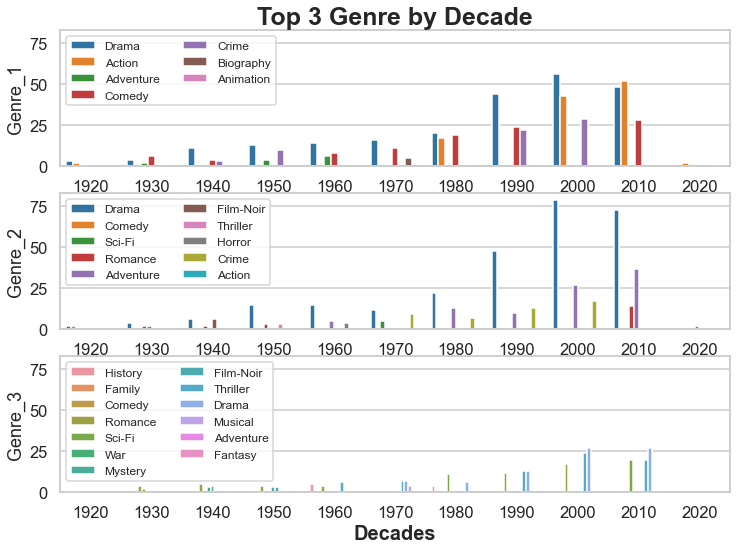

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,8.5), nrows=3, sharey=True)

sns.barplot(x='Decade',y='Genre_1',hue='level_1',data=df_top3_genre_1,ax=ax1)
sns.barplot(x='Decade',y='Genre_2',hue='level_1',data=df_top3_genre_2,ax=ax2)
sns.barplot(x='Decade',y='Genre_3',hue='level_1',data=df_top3_genre_3,ax=ax3)

ax1.set_title('Top 3 Genre by Decade', fontsize=25, fontweight ='bold')
ax3.set_xlabel('Decades', fontsize=20, fontweight ='bold')

ax1.legend(loc=2,ncol=2,fontsize='large')
ax2.legend(loc=2,ncol=2,fontsize='large')
ax3.legend(loc=2,ncol=2,fontsize='large')

## 发现，最常见的电影（不按任何顺序）为

#### 第一类：戏剧、动作、喜剧、犯罪

#### 第二代：戏剧、冒险、犯罪、浪漫

#### 第三代：戏剧、惊悚片、黑色电影、科幻

#### Q4. 在这些年代中，这些属于“流行的电影类型/类型组合”的电影的“平均票房”和“制作数量”有什么趋势？

In [24]:
# 为所有目标类型和类型组合创建数据帧
df_dra=df[df['Genre']==genre_5]
df_adv_dra=df[(df['Genre'].str.contains(genre_1))&(df['Genre'].str.contains(genre_5))]
df_act_dra=df[(df['Genre'].str.contains(genre_2))&(df['Genre'].str.contains(genre_5))]
df_com_dra=df[(df['Genre'].str.contains(genre_3))&(df['Genre'].str.contains(genre_5))]
df_cri_dra=df[(df['Genre'].str.contains(genre_4))&(df['Genre'].str.contains(genre_5))]

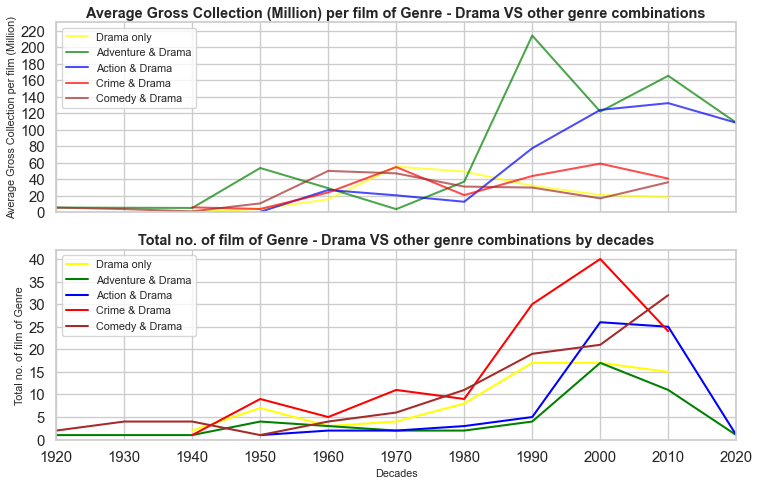

In [25]:
fig, (ax1, ax2) = plt.subplots(figsize=(13.5,8.5), nrows=2, dpi=65, sharex=True)

ax1.plot(df_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='yellow',label='Drama only',alpha=0.7)
ax1.plot(df_adv_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='green',label='Adventure & Drama',alpha=0.7)
ax1.plot(df_act_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='blue',label='Action & Drama',alpha=0.7)
ax1.plot(df_cri_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='red',label='Crime & Drama',alpha=0.7)
ax1.plot(df_com_dra.groupby('Decade')['Gross_Collection(Million)'].mean(),c='brown',label='Comedy & Drama',alpha=0.7)
ax1.set_title('Average Gross Collection (Million) per film of Genre - Drama VS other genre combinations',fontsize=16,fontweight ='bold')

ax2.plot(df_dra.groupby('Decade')['Count'].sum(),color='yellow',label='Drama only')
ax2.plot(df_adv_dra.groupby('Decade')['Count'].sum(),color='green',label='Adventure & Drama')
ax2.plot(df_act_dra.groupby('Decade')['Count'].sum(),color='blue',label='Action & Drama')
ax2.plot(df_cri_dra.groupby('Decade')['Count'].sum(),color='red',label='Crime & Drama')
ax2.plot(df_com_dra.groupby('Decade')['Count'].sum(),color='brown',label='Comedy & Drama')
ax2.set_title('Total no. of film of Genre - Drama VS other genre combinations by decades',fontsize=16,fontweight ='bold')

plt.xlim(1920,2020)
plt.xticks(range(1920,2030,10))
plt.xlabel('Decades',fontsize=12)
ax1.set_yticks(range(0,230,20))
ax1.set_ylim(0,230)
ax1.legend(fontsize='large')
ax1.set_ylabel('Average Gross Collection per film (Million)',fontsize=12)

ax2.set_yticks(range(0,42,5))
ax2.set_ylim(0,42)
ax2.legend(fontsize='large')
ax2.set_ylabel('Total no. of film of Genre',fontsize=12)

plt.show()

## 发现

#### 仅属于“戏剧”类型的电影在1970年代制作数量相对较低，但同时达到了“平均票房”的峰值，但即使在制作数量稳定增长（1970年代4部、1980年代8部、1990年代和2000年代17部）的情况下，“平均票房”在同一30年期间减少了一半以上；相反在1970年代至2000年代，“冒险与戏剧”('Adventure & Drama')和“动作与戏剧”('Action & Drama')电影的“平均票房”有快速增长。

#### 可以假设，观众可能变得更愿意花钱，来看电影作为一种娱乐形式，或者他们在平台的偏好上从线下转至线上，甚至对电影的类型偏好有更高要求，即类型/内容元素组合要更复杂，而不仅是单一类型。

#### 尽管在1990年代至2010年代的所有类型组合中，更多的电影属于“犯罪与戏剧”，但“冒险与戏剧”的“平均票房”要高得多。
<img src="adv_dra_top.png" width="650">

#### 在所有“冒险与戏剧”('Adventure & Drama')电影中，电影《狮子王》('Lion King')（亦属于动画(Animation)）有更高的IMDB评分，更高的票数(Votes)和票房(Gross Collection)，且时长(Runtime)明显更短。

#### +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

#### 电影《黑暗骑士》('The Dark Knight')的票数(Votes)和票房(Gross Collection)明显高于《狮子王》('Lion King')，且在2000年的40部“犯罪与戏剧”('Crime & Drama')电影中，它的这两个特征最高

#### 可以估计，“犯罪与戏剧”('Crime & Drama')电影对观众的吸引力越来越大，且随着此类型组合自1990年代以来制作数量的迅速增长，电影之间在票数(Votes)和票房(Gross Collection)方面具有一定激烈的竞争；且其他“犯罪与戏剧”电影的票房(Gross Collection)显著较低，排名也要低得多（第3名比第158-512名）。
<img src="cri_dra_top.png" width="650">

#### Q5. 这些“流行的电影类型/类型组合”电影的不同特征之间有什么相关性？

In [27]:
# 从与“戏剧”('Drama')的最常见类型组合的行中创建新的列“Genre_comb”(类型组合)
df_dra.loc[:,'Genre_Comb']='Drama'
df_adv_dra.loc[:,'Genre_Comb']='Adventure & Drama'
df_act_dra.loc[:,'Genre_Comb']='Action & Drama'
df_com_dra.loc[:,'Genre_Comb']='Comedy & Drama'
df_cri_dra.loc[:,'Genre_Comb']='Crime & Drama'
print(df_dra.shape[0], df_adv_dra.shape[0], df_act_dra.shape[0], df_com_dra.shape[0], df_cri_dra.shape[0])

73 46 65 104 129


In [28]:
# 合并所有数据帧
df_dra_all=pd.concat([df_dra, df_adv_dra, df_act_dra, df_com_dra, df_cri_dra],ignore_index=True)

In [29]:
# 其他发现 - 有100部电影有多于两种类型组合
print(df_dra_all[df_dra_all.groupby('Movie_Name')['Movie_Name'].transform('size') > 1].shape[0], 'films had more than 1 genre combination.')
print('E.g., a film that is in "Action, Comedy, Drama" genre has been split into "Action & Drama" & "Comedy & drama" rows in the dataframe.')

100 films had more than 1 genre combination.
E.g., a film that is in "Action, Comedy, Drama" genre has been split into "Action & Drama" & "Comedy & drama" rows in the dataframe.


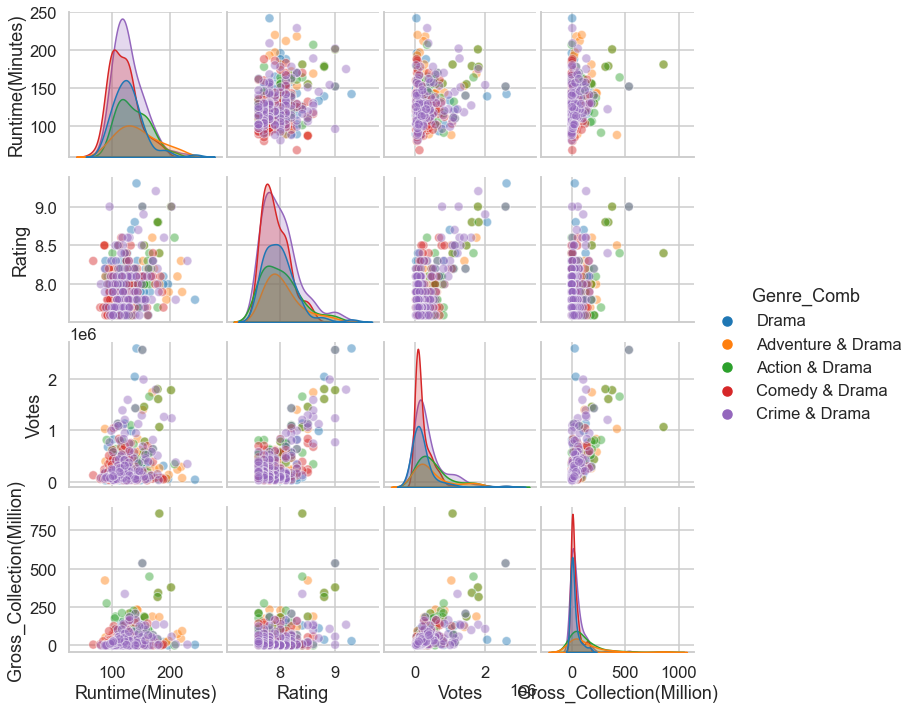

In [30]:
sns.pairplot(df_dra_all[['Runtime(Minutes)','Rating','Votes','Gross_Collection(Million)','Genre_Comb']],hue='Genre_Comb',plot_kws={'alpha':0.45,'linewidth':1})

## *三，就导演而言：*

#### Q6. 每位导演的“平均IMDB评级”与“执导电影总数”是多少？两者之间有相关性吗？

In [31]:
# 导演的“平均评级”和“执导的电影总数”
df_rate_dir=df.groupby('Director').agg({'Rating':'mean','Count':'sum'}).sort_values(by='Rating',ascending=False)
df_rate_dir['Rating']=round(df_rate_dir['Rating'],2)
df_rate_dir.columns=['Ave_Rating','Film Counts']
df_rate_dir

,Ave_Rating,Film Counts
Director,,
Frank Darabont,8.95,2
Irvin Kershner,8.70,1
Lana Wachowski,8.70,1
Fernando Meirelles,8.60,1
Roberto Benigni,8.60,1
...,...,...
Jonathan Levine,7.60,1
Georges Franju,7.60,1
Aneesh Chaganty,7.60,1


r^2 = 0.044


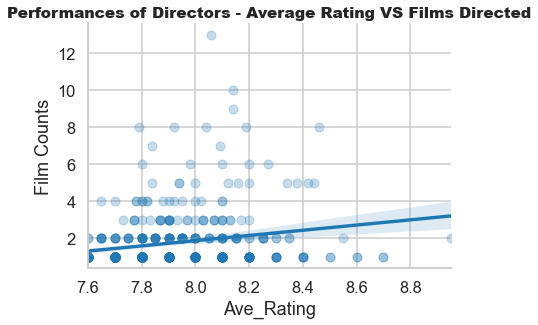

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(6.5, 4.5)

x=df_rate_dir['Ave_Rating']
y=df_rate_dir['Film Counts']

#绘制数据
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.25})
ax.set_title('Performances of Directors - Average Rating VS Films Directed', fontsize=15.5, fontweight ='heavy')

#计算r^2值
lin_reg = LinearRegression().fit(df_rate_dir[['Ave_Rating']],y)
r2 = lin_reg.score(df_rate_dir[['Ave_Rating']],y)

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

### 由于r^2=0.044，“导演总数量”和“平均评级”之间没有强的相关性。

#### 这意味着导演的电影执导数量对电影质量没有明显影响，即一些导演可能只执导了1-2部电影，这些电影代表了他们职业生涯中的最高表现，(评级高于8.6分），而一些导演总共执导了8部以上的电影，但他们的平均评级只在8.0-8.2分之间。

#### Q7. 与其他电影相比，“导演也有参演的电影”是否获得了更高的IMDB评级或更高的票房？或者倾向于具有更高或更短的时长？

In [33]:
# 添加一个新列，以标记导演是否也在电影中演出
def dir_also_act(x):
    if (x['Director']==x['Actor_1'])|(x['Director']==x['Actor_2'])|(x['Director']==x['Actor_3']):
        return 1
    else:
        return 0

In [34]:
df.loc[:,'Director_Acted'] = df.apply(dir_also_act,axis=1)
df['Director_Acted'].value_counts()

0    783
1     34
Name: Director_Acted, dtype: int64

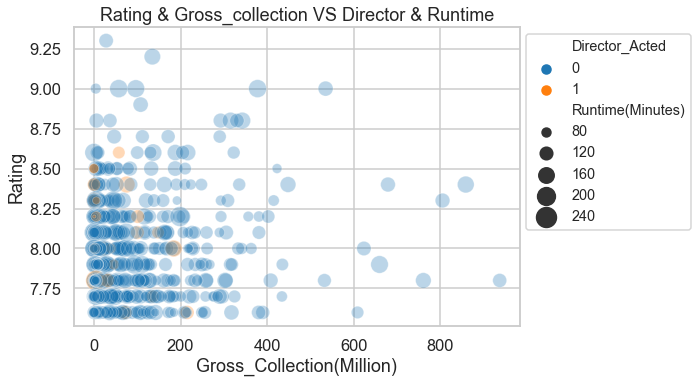

In [35]:
plt.figure(figsize=(8, 5.5))
sns.scatterplot(data=df, x='Gross_Collection(Million)', y='Rating', 
                alpha=0.3, hue='Director_Acted', size='Runtime(Minutes)', sizes=(10, 400))
plt.title('Rating & Gross_collection VS Director & Runtime')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1),fontsize='x-large')

#### Q8. 回到“流行的电影类型/类型组合”，相比其他电影，他们是否也倾向于获得更高的IMDB评级或更高的票房？

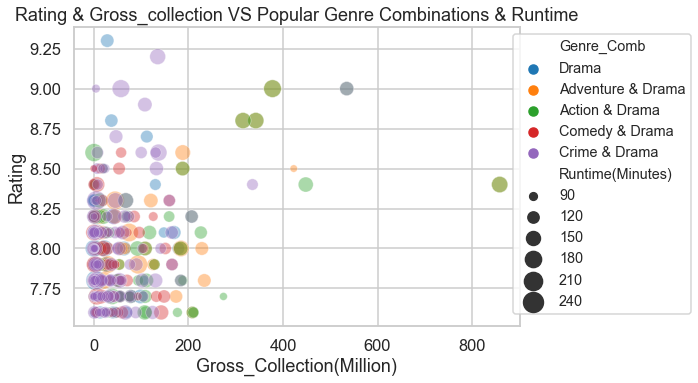

In [36]:
plt.figure(figsize=(8, 5.5))
sns.scatterplot(data=df_dra_all, x='Gross_Collection(Million)', y='Rating', 
                alpha=0.4, hue='Genre_Comb', size='Runtime(Minutes)', sizes=(10, 400))
plt.title('Rating & Gross_collection VS Popular Genre Combinations & Runtime')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1),fontsize='x-large')

#### 与“流行的电影类型/类型组合”的电影类似，“导演是否也在电影中出演”这一因素对IMDB评级或票房没有直接影响。

#### 尽管3部“动作与戏剧”('Action & Drama')电影的总票房更高，即约为3-4亿（最右侧亦有1个离群值，超过8亿）和4部“犯罪与戏剧”('Crime & Drama')电影的IMDB评分高于8.75分，但其他大部分都集中在图中的左下角。

#### IMDB评级可能与电影类型或其他特征有关，除了本分析中使用的特征外，我们可能还需要深入挖掘其他特征，例如电影描述（关于）中的关键字/内容，甚至电影的演员，以查看他们是否与评级和票房有某种高度的相关性。

## “那么，什么才是真正重要的呢？”

#### 作为一名演员或导演，你想达到什么样的目标呢？高评级？还是高利润？还是仅受欢迎程度（票数）？还是你个人对类型的偏好？我相信这在很大程度上取决于作家/导演的创意点子和演员的演技。